Total valid paths from e1 to e8 (Matrix): 393
Total valid paths from e1 to e8 (DFS):    393


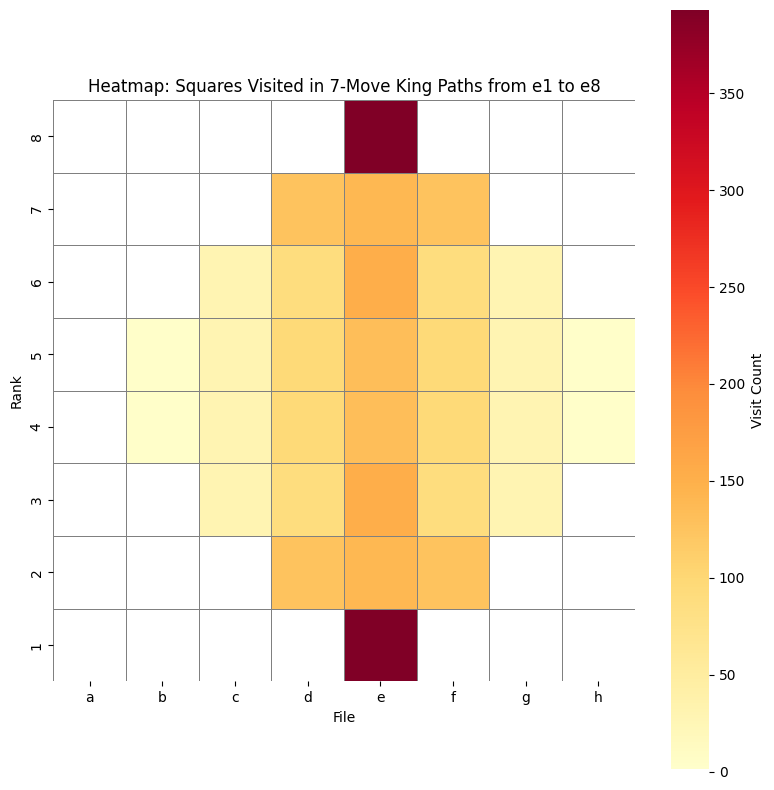


--- Performance Report ---
Matrix method: 393 paths
Time taken: 0.0041 seconds
Memory used: 129.95 KB

DFS method: 393 paths
Time taken: 3.3291 seconds
Memory used: 67.23 KB


In [13]:
# Combined Method: Matrix + DFS with Heatmap
# Counts 7-move king paths from e1 to e8 and shows visitation heatmap

# Install required packages at runtime (for Colab or fresh Python environments)
try:
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import defaultdict
    from matplotlib.colors import ListedColormap
    from numpy.linalg import matrix_power
except ImportError:
    import sys
    !{sys.executable} -m pip install numpy matplotlib seaborn
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import defaultdict
    from matplotlib.colors import ListedColormap
    from numpy.linalg import matrix_power

# Board dimensions
board_size = 8

# Coordinate mapping (0-indexed): e1 -> (4,0), e8 -> (4,7)
start = (4, 0)
end = (4, 7)
max_moves = 7

# Legal king moves (8 directions)
king_moves = [
    (-1, -1), (-1, 0), (-1, 1),
    (0, -1),          (0, 1),
    (1, -1),  (1, 0), (1, 1)
]

# -------------------------------
# METHOD 1: Matrix Exponentiation
# -------------------------------

def build_adjacency_matrix():
    A = np.zeros((64, 64), dtype=int)
    for r in range(8):
        for c in range(8):
            idx = r * 8 + c
            for dr, dc in king_moves:
                nr, nc = r + dr, c + dc
                if 0 <= nr < 8 and 0 <= nc < 8:
                    nidx = nr * 8 + nc
                    A[idx][nidx] = 1
    return A

def square_to_index(square):
    file = ord(square[0]) - ord('a')
    rank = int(square[1]) - 1
    return rank * 8 + file

def count_paths_matrix(start_sq, end_sq, moves):
    A = build_adjacency_matrix()
    A_n = matrix_power(A, moves)
    return A_n[square_to_index(start_sq)][square_to_index(end_sq)]

# -------------------------------
# METHOD 2: DFS + Heatmap
# -------------------------------

visit_counts = defaultdict(int)
path_counter_dfs = 0

def dfs_paths(x, y, moves_left, path):
    global path_counter_dfs
    if moves_left == 0:
        if (x, y) == end:
            path_counter_dfs += 1
            for px, py in path:
                visit_counts[(px, py)] += 1
        return
    for dx, dy in king_moves:
        nx, ny = x + dx, y + dy
        if 0 <= nx < board_size and 0 <= ny < board_size:
            dfs_paths(nx, ny, moves_left - 1, path + [(nx, ny)])

# Run both methods
total_matrix = count_paths_matrix("e1", "e8", max_moves)
dfs_paths(start[0], start[1], max_moves, [start])

print(f"Total valid paths from e1 to e8 (Matrix): {total_matrix}")
print(f"Total valid paths from e1 to e8 (DFS):    {path_counter_dfs}")

# -------------------------------
# Heatmap Generation
# -------------------------------

# Prepare heatmap matrix
heatmap_matrix = np.zeros((board_size, board_size), dtype=int)
for (x, y), count in visit_counts.items():
    heatmap_matrix[7 - y, x] = count  # Flip y-axis for correct chess orientation

# Custom colormap with white for zero
cmap = plt.cm.YlOrRd
new_colors = cmap(np.linspace(0, 1, 256))
new_colors[0] = np.array([1, 1, 1, 1])  # Set first color to white
new_cmap = ListedColormap(new_colors)

# Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(
    heatmap_matrix,
    annot=False,
    fmt="d",
    cmap=new_cmap,
    square=True,
    xticklabels=['a','b','c','d','e','f','g','h'],
    yticklabels=list(reversed(['1','2','3','4','5','6','7','8'])),
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Visit Count'}
)
plt.title("Heatmap: Squares Visited in 7-Move King Paths from e1 to e8")
plt.xlabel("File")
plt.ylabel("Rank")
plt.tight_layout()
plt.savefig("combined_king_path_heatmap.png")
plt.show()

# -------------------------------
# Performance Analysis
# -------------------------------
import time
import tracemalloc

# Time and memory for matrix method
start_time = time.time()
tracemalloc.start()
matrix_result = count_paths_matrix("e1", "e8", max_moves)
matrix_time = time.time() - start_time
matrix_memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Time and memory for DFS method
start_time = time.time()
tracemalloc.start()
path_counter_dfs = 0
visit_counts.clear()
dfs_paths(start[0], start[1], max_moves, [start])
dfs_time = time.time() - start_time
dfs_memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Output results
print("\n--- Performance Report ---")
print(f"Matrix method: {matrix_result} paths")
print(f"Time taken: {matrix_time:.4f} seconds")
print(f"Memory used: {matrix_memory[1] / 1024:.2f} KB")

print(f"\nDFS method: {path_counter_dfs} paths")
print(f"Time taken: {dfs_time:.4f} seconds")
print(f"Memory used: {dfs_memory[1] / 1024:.2f} KB")
